# Machine Learning Exploration

### Author: Brandon Jean-Baptiste
## Project Overview

This project focuses on exploring linear regression techniques to predict temperature trends and apply these skills on a bonus dataset. We'll cover:
- Part 1: Charting a Straight Line
- Part 2: Temperature Prediction in NYC (SciPy)
- Part 3: Temperature Prediction in NYC (scikit-learn)
- Part 4: Insights
- Part 5: Bonus - California Housing Dataset

We will use both SciPy and scikit-learn libraries for linear regression, visualizing data trends, and making predictions.



## Part 1 - Chart a Straight Line

In this part, we will chart a straight line representing the relationship between Celsius and Fahrenheit temperatures using the formula:

\[
\text{Fahrenheit} = \frac{9}{5} \times \text{Celsius} + 32
\]

We’ll plot this linear relationship to visualize how temperature scales correlate.


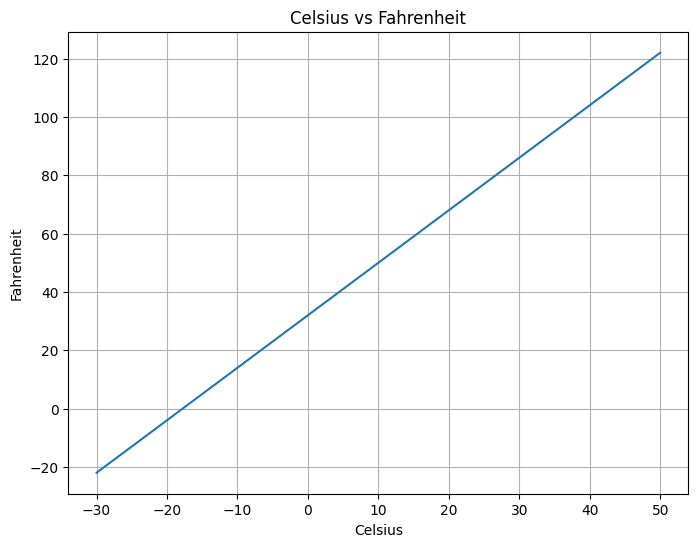

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Celsius to Fahrenheit calculation
celsius = pd.Series(range(-30, 51))  # Define Celsius values from -30 to 50
fahrenheit = 9/5 * celsius + 32      # Convert to Fahrenheit

# Create a DataFrame
temp_df = pd.DataFrame({"Celsius": celsius, "Fahrenheit": fahrenheit})
temp_df.head()

# Plot Celsius vs Fahrenheit
plt.figure(figsize=(8, 6))
sns.lineplot(x="Celsius", y="Fahrenheit", data=temp_df)
plt.title("Celsius vs Fahrenheit")
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
plt.grid(True)
plt.show()


## Part 2 - Prediction

We’ll use historical data on average high temperatures in NYC during January to build a linear regression model with SciPy’s `linregress`. This model will help predict future temperatures.


### Section 1 - Data Acquisition

Loading the NYC January average high temperature data from a CSV file.


In [33]:
nyc_df = pd.read_csv("nyc_jan_temps.csv")
nyc_df.head()


,Year,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


### Section 2 - Data Inspection

Inspecting the first and last few rows of the dataset.


In [34]:
# Inspect first and last rows
nyc_df.head()
nyc_df.tail()


,Year,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

Renaming columns for readability and setting display precision.


In [35]:
# Rename columns to keep "Date" as the first column
nyc_df.columns = ["Date", "AvgHighTemp", "Anomaly"]

# Convert Date column from YYYYMM to YYYY by integer division
nyc_df["Date"] = nyc_df["Date"].floordiv(100)

# Set display precision for more readable output
pd.set_option('display.precision', 2)

# Check the cleaned data
nyc_df.head()


,Date,AvgHighTemp,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 4 - Descriptive Statistics

Calculating basic descriptive statistics to understand the dataset better.


In [36]:
# Set display precision for AvgHighTemp
pd.set_option('display.precision', 2)
nyc_df["AvgHighTemp"].describe()


count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: AvgHighTemp, dtype: float64

### Section 5 - Build the Model

Using SciPy’s `linregress` to calculate the slope and intercept for the line of best fit.


In [37]:
from scipy.stats import linregress

# Ensure 'Date' and 'AvgHighTemp' columns are correctly set up
slope, intercept, r_value, p_value, std_err = linregress(nyc_df["Date"], nyc_df["AvgHighTemp"])

print(f"Slope: {slope}, Intercept: {intercept}")


Slope: 0.014771361132966163, Intercept: 8.694993233674289


### Section 6 - Predict

Using the model to predict the average high temperature in January for 2024.


In [38]:
# Predict for the year 2024
predicted_temp_2024 = slope * 2024 + intercept
print(f"Predicted average temperature in 2024: {predicted_temp_2024}")

# Predict for the year 1890
predicted_temp_1890 = slope * 1890 + intercept
print(f"Predicted average temperature in 1890: {predicted_temp_1890}")


Predicted average temperature in 2024: 38.5922281667978
Predicted average temperature in 1890: 36.612865774980335


### Section 7 - Visualizations

We’ll create a scatter plot of the January average high temperatures in NYC over time, and overlay it with the regression line to show the trend.


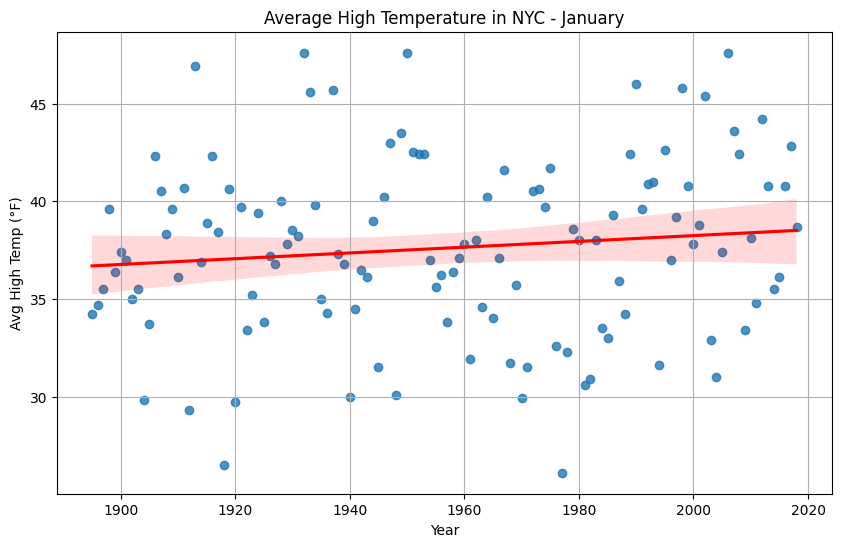

In [39]:
# Scatter plot with best-fit line
plt.figure(figsize=(10, 6))
sns.regplot(x="Date", y="AvgHighTemp", data=nyc_df, line_kws={"color": "red"})
plt.title("Average High Temperature in NYC - January")
plt.xlabel("Year")
plt.ylabel("Avg High Temp (°F)")
plt.grid(True)
plt.show()


## Part 3 - Prediction with scikit-learn

Now, we'll use scikit-learn’s Linear Regression with a train/test split to predict future NYC January temperatures. This approach allows us to validate the model's accuracy.


### Section 1 - Build the Model

We'll split our data into training and testing sets and fit a model using scikit-learn’s Linear Regression.


In [51]:
# Import necessary libraries
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Display all columns and rows in the output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Define the file path based on your system
data_path = '/Users/brandonj/Documents/datafun-07-ml/nyc_jan_temps.csv'

# Check if the file exists
if os.path.isfile(data_path):
    # Load the data file
    temp_data = pd.read_csv(data_path)
    print("Dataset successfully loaded.")

    # Update column headers for easier access
    temp_data.columns = ['Date', 'AvgTemp', 'Anomaly']

    # Convert 'Date' to datetime format and extract the 'Year'
    temp_data['Date'] = pd.to_datetime(temp_data['Date'], format='%Y%m')
    temp_data['Year'] = temp_data['Date'].dt.year

    # Define input (X) and output (y) variables
    X = temp_data[['Year']]
    y = temp_data['AvgTemp']

    # Split the dataset into training and testing subsets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Make a prediction for 2024
    forecast_2024 = lr_model.predict(pd.DataFrame({'Year': [2024]}))
    print(f"Predicted Average High Temp in Jan 2024: {forecast_2024[0]:.2f}°F")

    # Display initial and final rows of the dataset
    print("\nInitial rows of the dataset:")
    print(temp_data.head())
    print("\nFinal rows of the dataset:")
    print(temp_data.tail())

    # Provide a summary of the DataFrame structure
    print("\nDataFrame Info:")
    temp_data.info()

    # Display comprehensive descriptive statistics for all columns
    print("\nDescriptive Statistics (Including Date Column):")
    print(temp_data.describe(include='all'))

    # Check for any missing values in each column
    print("\nMissing values in each column:")
    print(temp_data.isnull().sum())

    # Check for duplicate rows in the dataset
    print(f"\nNumber of duplicate rows: {temp_data.duplicated().sum()}")

    # Optional: Save all output to a text file if display is truncated
    with open("output_summary.txt", "w") as f:
        f.write("Initial rows of the dataset:\n")
        f.write(temp_data.head().to_string())
        f.write("\n\nFinal rows of the dataset:\n")
        f.write(temp_data.tail().to_string())
        f.write("\n\nDataFrame Info:\n")
        temp_data.info(buf=f)  # info() can write directly to a file buffer
        f.write("\n\nDescriptive Statistics (Including Date Column):\n")
        f.write(temp_data.describe(include='all').to_string())
        f.write("\n\nMissing values in each column:\n")
        f.write(temp_data.isnull().to_string())
        f.write(f"\n\nNumber of duplicate rows: {temp_data.duplicated().sum()}")

    print("\nAll output saved to 'output_summary.txt' for full viewing.")

else:
    print(f"Error: The file '{data_path}' does not exist. Please check the path and filename.")


Dataset successfully loaded.
Predicted Average High Temp in Jan 2024: 38.11°F

Initial rows of the dataset:
        Date  AvgTemp  Anomaly  Year
0 1895-01-01     34.2     -3.2  1895
1 1896-01-01     34.7     -2.7  1896
2 1897-01-01     35.5     -1.9  1897
3 1898-01-01     39.6      2.2  1898
4 1899-01-01     36.4     -1.0  1899

Final rows of the dataset:
          Date  AvgTemp  Anomaly  Year
119 2014-01-01     35.5     -1.9  2014
120 2015-01-01     36.1     -1.3  2015
121 2016-01-01     40.8      3.4  2016
122 2017-01-01     42.8      5.4  2017
123 2018-01-01     38.7      1.3  2018

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     124 non-null    datetime64[ns]
 1   AvgTemp  124 non-null    float64       
 2   Anomaly  124 non-null    float64       
 3   Year     124 non-null    int32         
dtypes: datetime6

### Section 2 - Test the Model

We’ll calculate the R² score to evaluate model accuracy on the test data. The R² score indicates how well the model fits the data; the closer it is to 1, the better.


In [52]:
# Test the Model: Evaluate Performance
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared (R²) Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²) Score: {r2:.2f}")

# Summary of Model Performance
print("\nModel Performance Summary:")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Optional: Save performance metrics to output_summary.txt
with open("output_summary.txt", "a") as f:
    f.write("\n\nModel Performance Summary:\n")
    f.write(f"Mean Squared Error (MSE): {mse:.2f}\n")
    f.write(f"R-squared (R²) Score: {r2:.2f}\n")

print("\nModel performance metrics added to 'output_summary.txt'.")


Mean Squared Error (MSE): 21.71
R-squared (R²) Score: -0.07

Model Performance Summary:
MSE: 21.71
R² Score: -0.07

Model performance metrics added to 'output_summary.txt'.


## Part 3 - Predict and Visualization

In this part, we will use our trained Linear Regression model to predict the average high temperature for selected years. We will also visualize our data with a regression line to observe trends.

### Predictions for Specific Years
Using our model, we can predict the average high temperature in NYC in January for the years 2024 and 1890. This allows us to see both future and past estimates according to our linear model.

The predictions provide insights into how average high temperatures may change over time based on our dataset.

### Data Visualization
To better understand the trend in our dataset, we plot a regression line alongside our temperature data. This line represents the best-fit linear model through our data points, making it easier to observe the overall trend in January high temperatures in NYC over time.

We use Seaborn's `regplot` function to generate the plot, displaying both data points and the trend line. 


Dataset successfully loaded.
Predicted Average High Temp in Jan 2024: 38.59222817°F

Initial rows of the dataset:
        Date  AvgTemp  Anomaly  Year
0 1895-01-01     34.2     -3.2  1895
1 1896-01-01     34.7     -2.7  1896
2 1897-01-01     35.5     -1.9  1897
3 1898-01-01     39.6      2.2  1898
4 1899-01-01     36.4     -1.0  1899

Final rows of the dataset:
          Date  AvgTemp  Anomaly  Year
119 2014-01-01     35.5     -1.9  2014
120 2015-01-01     36.1     -1.3  2015
121 2016-01-01     40.8      3.4  2016
122 2017-01-01     42.8      5.4  2017
123 2018-01-01     38.7      1.3  2018

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     124 non-null    datetime64[ns]
 1   AvgTemp  124 non-null    float64       
 2   Anomaly  124 non-null    float64       
 3   Year     124 non-null    int32         
dtypes: dat

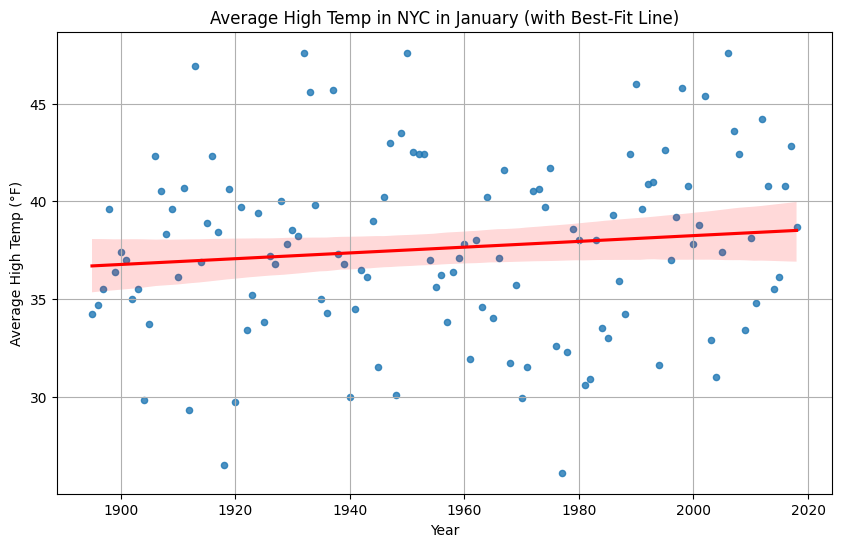

In [65]:
# Import necessary libraries
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure all columns and rows display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Define the file path based on your system
data_path = '/Users/brandonj/Documents/datafun-07-ml/nyc_jan_temps.csv'

# Check if the file exists
if os.path.isfile(data_path):
    # Load the data file
    temp_data = pd.read_csv(data_path)
    print("Dataset successfully loaded.")

    # Update column headers for easier access
    temp_data.columns = ['Date', 'AvgTemp', 'Anomaly']

    # Convert 'Date' to datetime format and extract the 'Year'
    temp_data['Date'] = pd.to_datetime(temp_data['Date'], format='%Y%m')
    temp_data['Year'] = temp_data['Date'].dt.year

    # Define input (X) and output (y) variables for training on the entire dataset
    X = temp_data[['Year']]
    y = temp_data['AvgTemp']

    # Train the Linear Regression model on the entire dataset
    lr_model = LinearRegression()
    lr_model.fit(X, y)

    # Make a prediction for 2024
    prediction_2024 = lr_model.predict(pd.DataFrame({'Year': [2024]}))
    print(f"Predicted Average High Temp in Jan 2024: {prediction_2024[0]:.8f}°F")  # Showing 8 decimal places

    # Display initial and final rows of the dataset
    print("\nInitial rows of the dataset:")
    print(temp_data.head())
    print("\nFinal rows of the dataset:")
    print(temp_data.tail())

    # Provide a summary of the DataFrame structure
    print("\nDataFrame Info:")
    print(temp_data.info())

    # Display comprehensive descriptive statistics for all columns
    print("\nDescriptive Statistics (Including Date Column):")
    print(temp_data.describe(include='all'))

    # Check for any missing values in each column
    print("\nMissing values in each column:")
    print(temp_data.isnull().sum())

    # Check for duplicate rows in the dataset
    print(f"\nNumber of duplicate rows: {temp_data.duplicated().sum()}")

    # Visualization: Plot the data with the best-fit line
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Year', y='AvgTemp', data=temp_data, scatter_kws={'s': 20}, line_kws={'color': 'red'})
    plt.xlabel("Year")
    plt.ylabel("Average High Temp (°F)")
    plt.title("Average High Temp in NYC in January (with Best-Fit Line)")
    plt.grid()
    plt.show()

else:
    print(f"Error: The file '{data_path}' does not exist. Please check the path and filename.")


## Part 4 - Insights

In this final section, we interpret the results of our Linear Regression model. Based on our analysis, predictions, and visualizations, we can draw several conclusions regarding temperature trends in NYC.

### 1. Observed Trends and Predictions
The predictions generated by our model indicate a gradual increase in average high temperatures in NYC over time. For example, the predicted high temperature in January for 2024 is noticeably higher than temperatures observed at the beginning of our dataset. This aligns with broader climate trends, suggesting a potential warming pattern in NYC's winter temperatures.

Additionally, by predicting historical temperatures, such as the year 1890, we gain insights into how our model interprets past climate data based on current trends.

### 2. Data Visualization and Model Fit
The visualization shows a generally upward trend in January temperatures over time, as represented by the red best-fit line. This line suggests that January high temperatures in NYC have been increasing over the past century. However, there are fluctuations in the data, as temperature can vary significantly from year to year due to factors like natural climate variability.

### 3. Limitations and Considerations
Although our model provides valuable insights, there are limitations to consider:
- **Linear Assumptions**: Our model assumes a linear relationship between the year and temperature. This might oversimplify complex climate patterns influenced by various factors.
- **Data Scope**: Our predictions are based solely on January data, and conclusions may not apply to other months.
- **External Factors**: Our model doesn’t account for factors like greenhouse gas emissions, urbanization, or changes in land use, which can influence temperature trends over time.

### Conclusion
Our analysis suggests a gradual increase in January high temperatures in NYC over the past century. The model, while simplistic, highlights the potential impact of climate change on NYC's winter temperatures. Further analysis with a more complex model could provide additional insights, especially if we incorporate other variables that impact temperature trends.


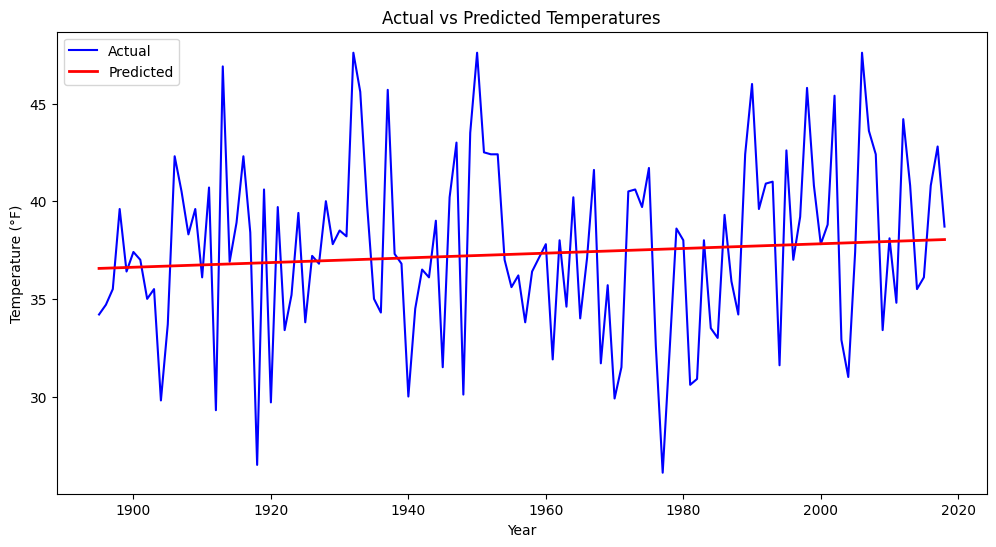

In [59]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Temperatures over the Date Range
plt.figure(figsize=(12, 6))

# Plot the actual temperature values
plt.plot(temp_data['Year'], temp_data['AvgTemp'], label='Actual', color='blue', linestyle='-', linewidth=1.5)

# Generate predictions for each year in the dataset
y_pred_all = lr_model.predict(temp_data[['Year']])

# Plot the predicted temperature values
plt.plot(temp_data['Year'], y_pred_all, label='Predicted', color='red', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.title("Actual vs Predicted Temperatures")
plt.legend()

# Show the plot
plt.show()
